In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


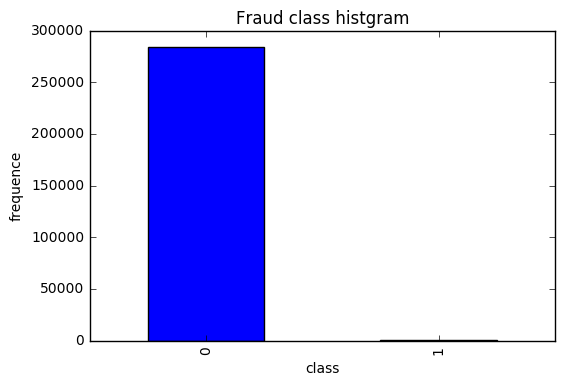

In [3]:
count_classes = pd.value_counts(data['Class'],sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title('Fraud class histgram')
plt.xlabel('class')
plt.ylabel('frequence')

In [4]:
from sklearn.preprocessing import StandardScaler

print(data.Amount.shape)
data['nermAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1,1))
data = data.drop(['Time','Amount'],axis = 1)
data.head()

(284807,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nermAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
print(data.nermAmount.shape)

(284807,)


In [6]:
X = data.ix[:,data.columns!='Class']
y = data.ix[:,data.columns=='Class']
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

normal_indices = data[data.Class == 0].index
print(type(normal_indices))
print(normal_indices)
random_normal_indices = np.random.choice(normal_indices,number_records_fraud,replace= False)#false 不放回抽样
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.ix[:,under_sample_data.columns == 'Class']

print('percentage of normal transaction',len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print(len(under_sample_data))

<class 'pandas.indexes.numeric.Int64Index'>
Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)
percentage of normal transaction 0.5
984


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.3,random_state = 0)#random_state 随机数种子


X_train_undersample,X_test_undersample,y_train_undersample,y_test_undersample = train_test_split(X_undersample
                                                                                                ,y_undersample
                                                                                                ,test_size = 0.2
                                                                                                ,random_state = 0)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.metrics import confusion_matrix,recall_score,classification_report

In [9]:
def printing_KFold_scroes(x_train_data,y_train_data):
    fold = KFold(5,shuffle=False)#shuffle是否洗牌
    c_param_range = [0.01,0.1,1.10,100]
    results_table = pd.DataFrame(index = range(len(c_param_range),2),columns=['C_parameter','Mean recall'])
    results_table['C_parameter'] = c_param_range
    
    j = 0
    for c_param in c_param_range:
        print('C parameter:',c_param)
        
        recall_accs = []
        for iteration,indices in enumerate(fold.split(x_train_data),start=1):
            lr = LogisticRegression(C = c_param,penalty='l1')
            
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())#训练集
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:])#开发集
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration',iteration,'recall score = ',recall_acc)
            
        results_table.ix[j,'mean recall score'] = np.mean(recall_accs)
        j+=1
        print('')
        print('mean recall scores',np.mean(recall_accs))
        print('')
    best_c = results_table.loc[results_table['mean recall score'].idxmax()]['C_parameter']
    print('best_c:',best_c)
    return best_c        

In [10]:
best_c=printing_KFold_scroes(X_train_undersample,y_train_undersample)

C parameter: 0.01
Iteration 1 recall score =  0.9438202247191011
Iteration 2 recall score =  0.9166666666666666
Iteration 3 recall score =  0.9420289855072463
Iteration 4 recall score =  0.9634146341463414
Iteration 5 recall score =  0.948051948051948

mean recall scores 0.9427964918182606

C parameter: 0.1
Iteration 1 recall score =  0.8876404494382022
Iteration 2 recall score =  0.8452380952380952
Iteration 3 recall score =  0.927536231884058
Iteration 4 recall score =  0.9512195121951219
Iteration 5 recall score =  0.9090909090909091

mean recall scores 0.9041450395692772

C parameter: 1.1
Iteration 1 recall score =  0.8764044943820225
Iteration 2 recall score =  0.8928571428571429
Iteration 3 recall score =  0.927536231884058
Iteration 4 recall score =  0.9634146341463414
Iteration 5 recall score =  0.9090909090909091

mean recall scores 0.9138606824720947

C parameter: 100
Iteration 1 recall score =  0.8876404494382022
Iteration 2 recall score =  0.9047619047619048
Iteration 3 rec

In [11]:
def select_model_by_cross_validate(x_train_data,y_train_data):

    fold = KFold(5,shuffle = False) 
     # Different C parameters
    c_param_range = [0.01,0.1,1,10]

    result_table = pd.DataFrame(index=range(len(c_param_range),2),columns=['C_parameter','Recall_score'])
    i=0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')
        lr = LogisticRegression(C = c_param,penalty='l1')

        # 核心方法
        scores = cross_validate(lr,x_train_data,y_train_data,scoring='recall',cv=fold,return_train_score=False)#recall相当于调用recall_score
        mean_score = np.array(sorted(scores['test_score'])).mean()
        print(mean_score)
        result_table.loc[i,'C_parameter'] = c_param
        result_table.loc[i,'Recall_score'] = mean_score
        i+=1

    best_sc = result_table.iloc[result_table['Recall_score'].idxmax()]['C_parameter']
    #print result_table.head()

In [12]:
select_model_by_cross_validate(X_train_undersample,y_train_undersample)

-------------------------------------------
C parameter:  0.01
-------------------------------------------

0.9427964918182606
-------------------------------------------
C parameter:  0.1
-------------------------------------------

0.9041450395692774
-------------------------------------------
C parameter:  1
-------------------------------------------

0.9161078734833307
-------------------------------------------
C parameter:  10
-------------------------------------------

0.9167592331967324


D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
def select_model_by_gridSearchCV(x_train_data,y_train_data):
    fold = KFold(5,shuffle = False)
    c_param_range = {'C':[0.01,0.1,1,10]}

    lr = LogisticRegression(penalty='l1')
    grid = GridSearchCV(lr, c_param_range, cv=fold, scoring="recall")

    grid.fit(x_train_data, y_train_data)

    print(grid.best_score_)    #查看最佳分数(此处为f1_score)
    print(grid.best_params_)
    print(grid.best_estimator_)
    return grid.best_params_

In [15]:
select_model_by_gridSearchCV(X_train_undersample,y_train_undersample)

D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.9427645908115887
{'C': 0.01}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 0.01}

In [16]:
#draw the confusion_matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9340659340659341


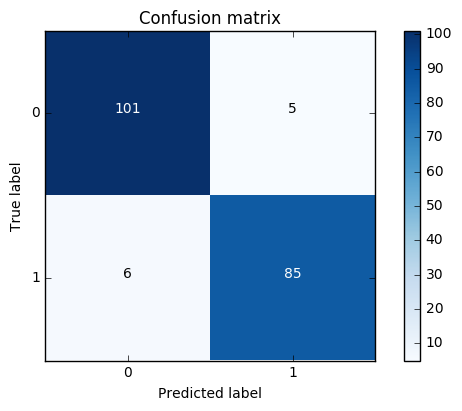

In [17]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
np.set_printoptions(precision=2)#设置打印时的一些参数

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')

Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  1.0
Recall metric in the testing dataset:  0.967032967032967
Recall metric in the testing dataset:  0.9340659340659341
Recall metric in the testing dataset:  0.8901098901098901
Recall metric in the testing dataset:  0.8571428571428571
Recall metric in the testing dataset:  0.8021978021978022
Recall metric in the testing dataset:  0.6703296703296703


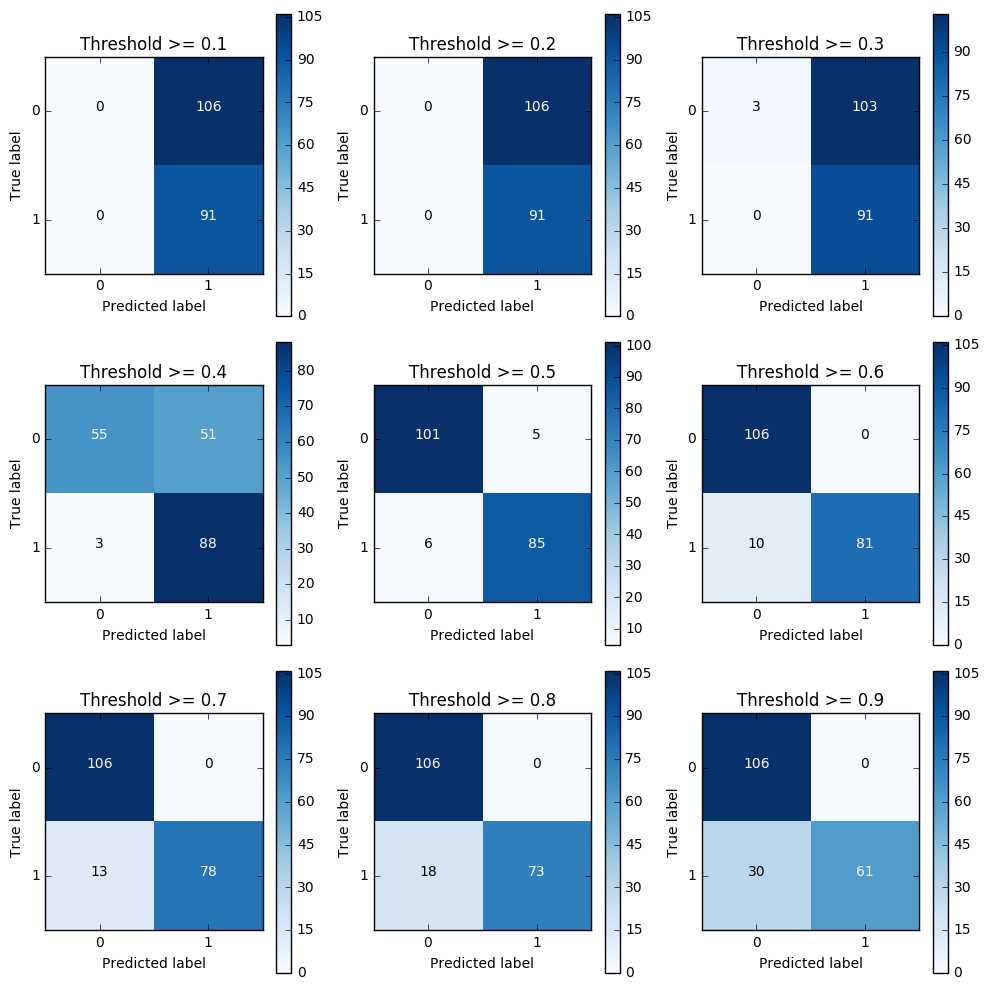

In [18]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i

    plt.subplot(3,3,j)
    j += 1

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

In [19]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

D:\Anaconda\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [20]:
credit_cards=pd.read_csv('creditcard.csv')

columns=credit_cards.columns
# The labels are in the last column ('Class'). Simply remove it to obtain features columns
features_columns=columns.delete(len(columns)-1)

features=credit_cards[features_columns]
labels=credit_cards['Class']

In [21]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [22]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [23]:
len(os_labels[os_labels==1])

227454

In [26]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_KFold_scroes(os_features,os_labels)

C parameter: 0.01
Iteration 1 recall score =  0.8903225806451613
Iteration 2 recall score =  0.8947368421052632
Iteration 3 recall score =  0.9687949540776807
Iteration 4 recall score =  0.9577933854321232
Iteration 5 recall score =  0.9584418724788693

mean recall scores 0.9340179269478195

C parameter: 0.1
Iteration 1 recall score =  0.8903225806451613
Iteration 2 recall score =  0.8947368421052632
Iteration 3 recall score =  0.9694367599867213
Iteration 4 recall score =  0.9594970378430662
Iteration 5 recall score =  0.9602004814191974

mean recall scores 0.9348387403998819

C parameter: 1.1
Iteration 1 recall score =  0.8903225806451613
Iteration 2 recall score =  0.8947368421052632
Iteration 3 recall score =  0.9706539780900741
Iteration 4 recall score =  0.960321385783845
Iteration 5 recall score =  0.9608599597718205

mean recall scores 0.9353789492792328

C parameter: 100
Iteration 1 recall score =  0.8903225806451613
Iteration 2 recall score =  0.8947368421052632
Iteration 3 r